# Probabilities, Likelihoods, and Bayes Theorem

Created: 08/25/2023 by Tom Lever

Updated: 08/25/2023 by Tom Lever

**SUMMARY**: In this notebook we will be reviewing some probability distributions, showing histograms and scatterplots to visualize the distributions in Python in Section 1. In Section 2 we define likelihoods, and show how to compute them in Python. In Section 3 we explain Bayes Theorem, and show how to use Bayes Theorem to compute the posterior probability for parameters based on observed data, using the likelihoods from Section 2.

## Section 1

In this section we generate samples from a variety of distributions and use seaborn and matplotlib to plot the resulting data.

First 5 values from uniform distribution:
[10.87300639 12.02004059  5.09810059 13.67518484  6.04377386]


C:\Users\Tom\AppData\Local\Temp\ipykernel_20372\2369518994.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  the_Axes = sns.distplot(


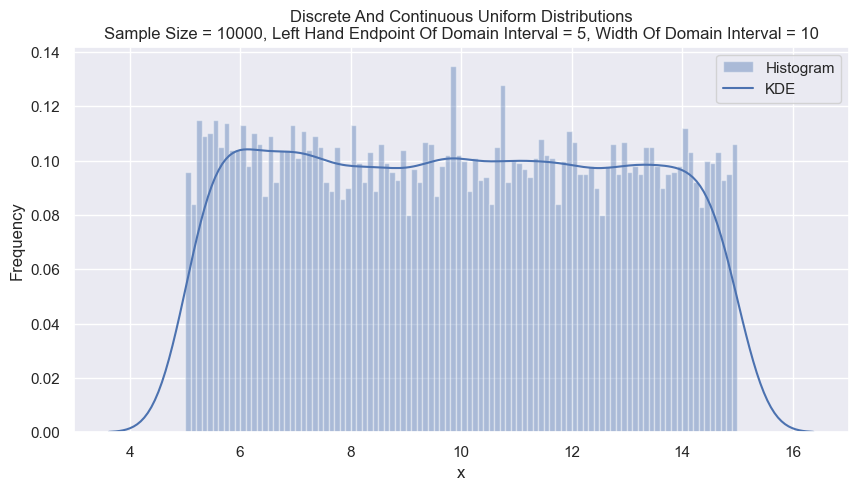

In [1]:
from scipy.stats import uniform
sample_size = 10000
left_hand_endpoint_of_domain_interval = 5
width_of_domain_interval = 10
array_of_uniformly_distributed_random_numbers = uniform.rvs(
    size = sample_size,
    loc = left_hand_endpoint_of_domain_interval,
    scale = width_of_domain_interval
)
print("First 5 values from uniform distribution:")
print(array_of_uniformly_distributed_random_numbers[0:5])
import seaborn as sns
sns.set(color_codes = True)
sns.set(rc = {'figure.figsize': (10, 5)})
the_Axes = sns.distplot(
    a = array_of_uniformly_distributed_random_numbers,
    bins = 100,
    kde_kws = {"label": "KDE"},
    hist_kws = {"label": "Histogram"}
)
the_Axes.set(
    xlabel = "x",
    ylabel = "Frequency",
    title = (
        "Discrete And Continuous Uniform Distributions"
        + f"\nSample Size = {sample_size}, Left Hand Endpoint Of Domain Interval = {left_hand_endpoint_of_domain_interval}, Width Of Domain Interval = {width_of_domain_interval}"
    )
)
import matplotlib.pyplot as plt
plt.legend()
plt.savefig("Discrete_And_Continuous_Uniform_Distributions.png")
plt.show()

First 5 values from normal distribution:
[3.65084926 5.67324968 1.86232778 3.29994823 2.98782492]


C:\Users\Tom\AppData\Local\Temp\ipykernel_20372\2142670968.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  the_Axes = sns.distplot(


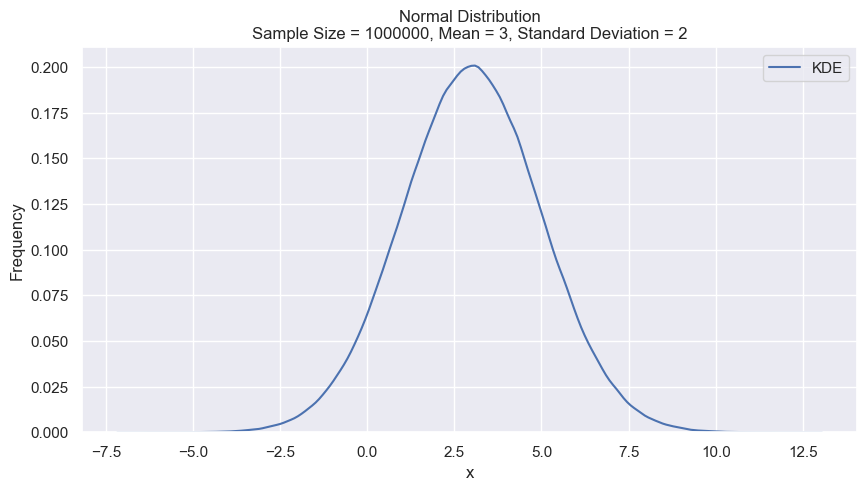

In [2]:
from scipy.stats import norm
sample_size = 1000000
mean = 3
standard_deviation = 2
array_of_normally_distributed_random_numbers = norm.rvs(
    size = sample_size,
    loc = mean,
    scale = standard_deviation
)
print("First 5 values from normal distribution:")
print(array_of_normally_distributed_random_numbers[0:5])
import seaborn as sns
sns.set(color_codes = True)
sns.set(rc = {'figure.figsize': (10, 5)})
the_Axes = sns.distplot(
    a = array_of_normally_distributed_random_numbers,
    bins = 100,
    kde_kws = {"label": "KDE"},
    hist = False
)
the_Axes.set(
    xlabel = "x",
    ylabel = "Frequency",
    title = (
        "Normal Distribution"
        + f"\nSample Size = {sample_size}, Mean = {mean}, Standard Deviation = {standard_deviation}"
    )
)
import matplotlib.pyplot as plt
plt.legend()
plt.savefig("Normal_Distribution.png")
plt.show()

In [3]:
array_of_normally_distributed_numbers = norm.rvs(size = 100, loc = 3, scale = 2)
print(array_of_normally_distributed_numbers)

[ 2.41591132  6.61938751  1.87395328  0.32359779  4.9180412   1.87967533
  2.55080554  4.76359442  2.36992063  4.10284377  0.4318255   3.63898207
  1.80143187  2.39898672  7.49506373  1.2200336   3.15083625  3.0236265
  2.17926305  2.02535425  3.76647834  2.91297321  2.3774532   0.2267422
  2.74762288  5.41987568 -0.03949689  5.80135228  2.73817969  0.86016955
  0.08513253  5.62707705  3.87511153  2.1309852  -2.07858217  3.24521386
  0.2825905   4.49737141  6.98416521  1.96926192  3.91176263 -1.2451421
  3.13419424 -0.1352894   0.77543312  5.05257692  4.2205934   5.45461439
  4.54481395  2.96665317  5.74420511  3.50800119  5.55443445  4.24767554
  5.71997955  2.38214963  2.65416921  4.28457747  4.67907727  6.22620563
  4.95035234 -1.80617715  3.54454257  1.16657772  6.03328773  3.69211751
  3.23053674  1.31577246  4.64179194  0.93539638  7.844988    2.12354416
  0.28263886 -0.17095374  2.68476616  1.81651027 -0.86367726  3.57318137
  3.68857623  3.76283153 -0.70610188  2.782136    4.76

First 5 values from Bernoulli distribution:
[0 0 0 0 1]


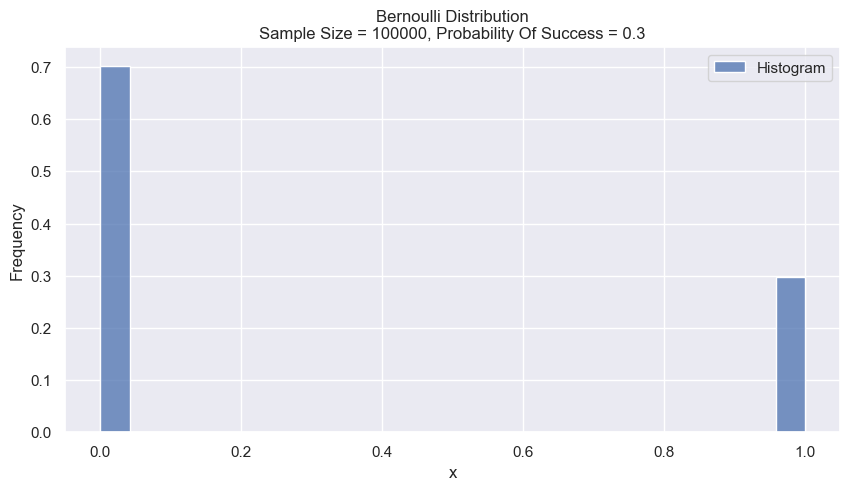

In [4]:
from scipy.stats import bernoulli
sample_size = 100000
probability_of_success = 0.3
array_of_Bernoulli_distributed_random_numbers = bernoulli.rvs(
    size = sample_size,
    p = probability_of_success
)
print('First 5 values from Bernoulli distribution:')
print(array_of_Bernoulli_distributed_random_numbers[0:5])
import seaborn as sns
sns.set(color_codes = True)
sns.set(rc = {'figure.figsize': (10, 5)})
the_Axes = sns.histplot(
    data = array_of_Bernoulli_distributed_random_numbers,                  
    stat = "probability",
    label = "Histogram"
)
the_Axes.set(
    xlabel='x',
    ylabel='Frequency',
    title = (
        "Bernoulli Distribution"
        + f"\nSample Size = {sample_size}, Probability Of Success = {probability_of_success}"
    )
)
import matplotlib.pyplot as plt
plt.legend()
plt.savefig("Bernoulli_Distribution.png")
plt.show()

First 5 values from binomial distribution:
[8 9 9 ... 5 6 6]


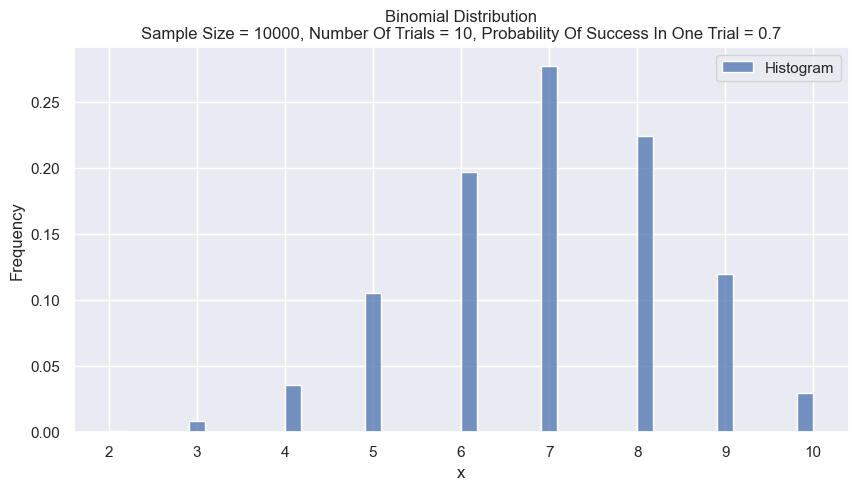

In [5]:
from scipy.stats import binom
sample_size = 10000
number_of_trials = 10
probability_of_success_in_one_trial = 0.7
array_of_binomially_distributed_numbers = binom.rvs(
    size = sample_size,
    n = number_of_trials,
    p = probability_of_success_in_one_trial
)
print("First 5 values from binomial distribution:")
print(array_of_binomially_distributed_numbers)
import seaborn as sns
sns.set(color_codes = True)
sns.set(rc = {'figure.figsize': (10, 5)})
the_Axes = sns.histplot(
    data = array_of_binomially_distributed_numbers,
    stat = "probability",
    label = "Histogram"
)
the_Axes.set(
    xlabel = "x",
    ylabel = "Frequency",
    title = (
        "Binomial Distribution"
        + f"\nSample Size = {sample_size}, Number Of Trials = {number_of_trials}, Probability Of Success In One Trial = {probability_of_success_in_one_trial}"
    )
)
import matplotlib.pyplot as plt
plt.legend()
plt.savefig("Binomial_Distribution.png")
plt.show()

First 5 values from Poisson distribution:
[5 3 5 2 1]


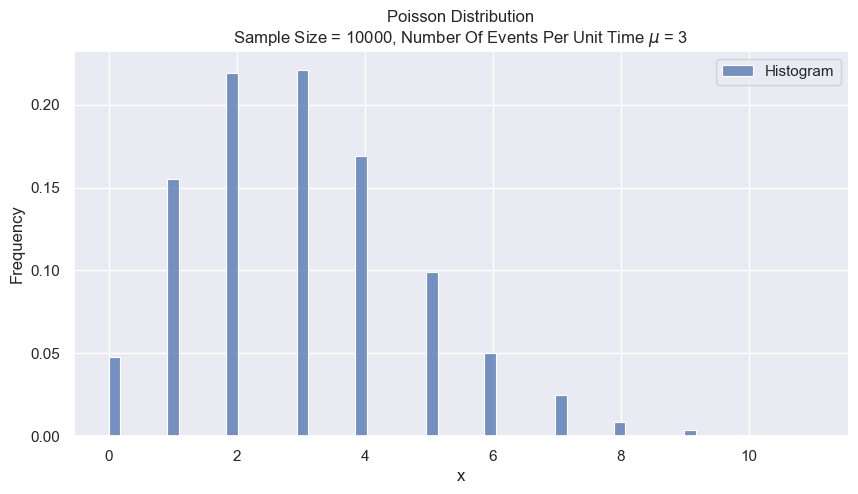

In [6]:
from scipy.stats import poisson
sample_size = 10000
number_of_events_per_unit_time_mu = 3
array_of_Poisson_distributed_numbers = poisson.rvs(
    size = sample_size,
    mu = number_of_events_per_unit_time_mu
)
print("First 5 values from Poisson distribution:")
print(array_of_Poisson_distributed_numbers[0:5])
import seaborn as sns
sns.set(color_codes = True)
sns.set(rc = {'figure.figsize': (10, 5)})
the_Axes = sns.histplot(
    data = array_of_Poisson_distributed_numbers,
    stat = "probability",
    label = "Histogram"
)
the_Axes.set(
    xlabel = "x",
    ylabel = "Frequency",
    title = (
        "Poisson Distribution"
        + f"\nSample Size = {sample_size}, Number Of Events Per Unit Time " + r"$\mu$" + f" = {number_of_events_per_unit_time_mu}"
    )
)
import matplotlib.pyplot as plt
plt.legend()
plt.savefig("Poisson_Distribution.png")
plt.show()

First 5 values from Beta distribution:
[0.05941506 0.13004595 0.09334389 0.16134124 0.02742097]


C:\Users\Tom\AppData\Local\Temp\ipykernel_20372\1727283562.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  the_Axes = sns.distplot(


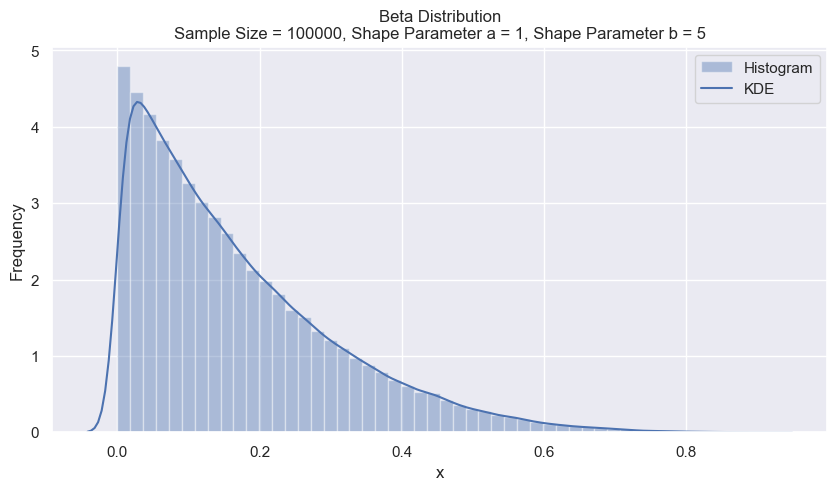

In [7]:
from scipy.stats import beta
sample_size = 100000
shape_parameter_a = 1
shape_parameter_b = 5
array_of_Beta_distributed_numbers = beta.rvs(
    size = sample_size,
    a = shape_parameter_a,
    b = shape_parameter_b
)
print("First 5 values from Beta distribution:")
print(array_of_Beta_distributed_numbers[0:5])
import seaborn as sns
sns.set(color_codes = True)
sns.set(rc = {'figure.figsize': (10, 5)})
the_Axes = sns.distplot(
    a = array_of_Beta_distributed_numbers,
    kde_kws = {"label": "KDE"},
    hist_kws = {"label": "Histogram"}
)
the_Axes.set(
    xlabel = "x",
    ylabel = "Frequency",
    title = (
        "Beta Distribution"
        + f"\nSample Size = {sample_size}, Shape Parameter a = {shape_parameter_a}, Shape Parameter b = {shape_parameter_b}"
    )
)
import matplotlib.pyplot as plt
plt.legend()
plt.savefig("Beta_Distribution.png")
plt.show()

First 5 values from Gamma distribution:
[ 6.65051618  6.52075382  2.71223827  4.92046734 11.13377801]


C:\Users\Tom\AppData\Local\Temp\ipykernel_20372\1689612271.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  the_Axes = sns.distplot(


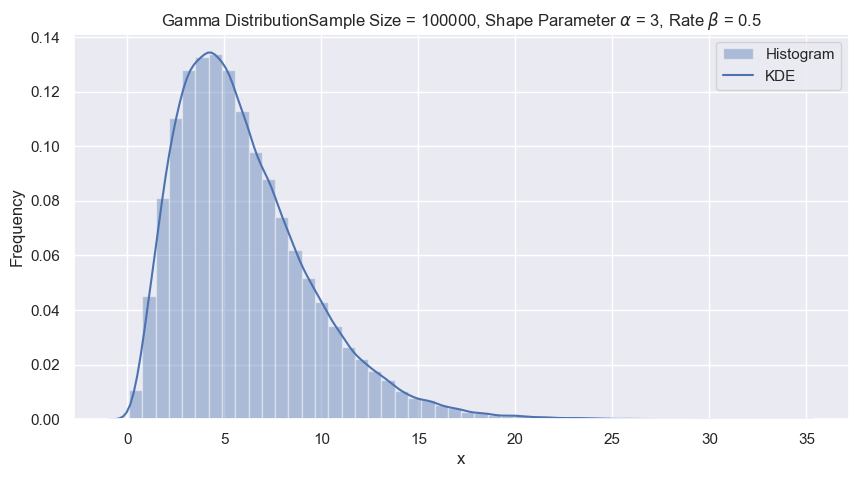

In [8]:
from scipy.stats import gamma
sample_size = 100000
shape_parameter_alpha = 3
rate_beta = 1 / 2
array_of_Gamma_distributed_random_numbers = gamma.rvs(
    size = sample_size,
    a = shape_parameter_alpha,
    scale = 1 / rate_beta
)
print("First 5 values from Gamma distribution:")
print(array_of_Gamma_distributed_random_numbers[0:5])
import seaborn as sns
sns.set(color_codes = True)
sns.set(rc = {'figure.figsize': (10, 5)})
the_Axes = sns.distplot(
    array_of_Gamma_distributed_random_numbers,
    kde_kws = {"label": "KDE"},
    hist_kws = {"label": "Histogram"}
)
the_Axes.set(
    xlabel = "x",
    ylabel = "Frequency",
    title = (
        f"Gamma Distribution"
        + f"Sample Size = {sample_size}, Shape Parameter " + r"$\alpha$" + f" = {shape_parameter_alpha}, Rate " + r"$\beta$" + f" = {rate_beta}"
    )
)
import matplotlib.pyplot as plt
plt.legend()
plt.savefig("Gamma_Distribution.png")
plt.show()


In [9]:
print('Comparing the data mean to the distribution mean:')
import numpy as np
print(np.mean(array_of_Gamma_distributed_random_numbers))
print(shape_parameter_alpha / rate_beta)

Comparing the data mean to the distribution mean:
6.009094469867907
6.0


First 5 values from Student's t distribution:
[ 0.65558741 -0.38051098 -0.80670924 -0.73658824 -0.8114292 ]


C:\Users\Tom\AppData\Local\Temp\ipykernel_20372\1364990886.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  the_Axes = sns.distplot(


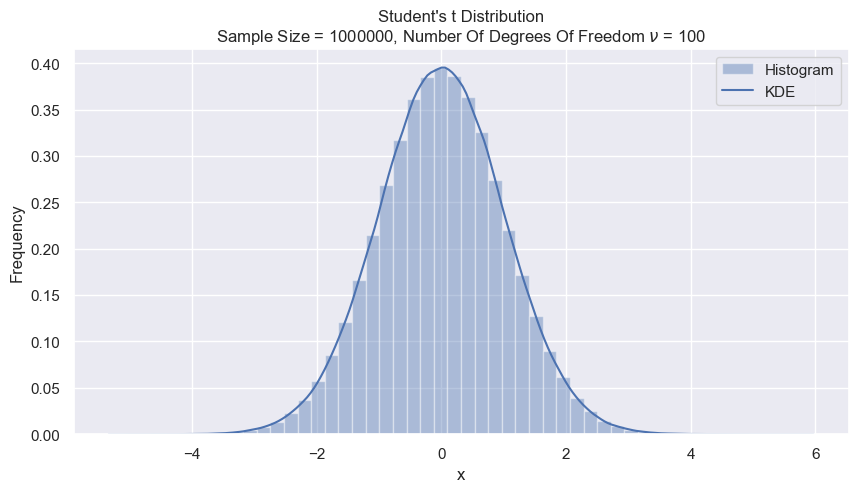

In [10]:
from scipy.stats import t
sample_size = 1000000
number_of_degrees_of_freedom_nu = 100
array_of_Students_t_distributed_numbers = t.rvs(
    size = sample_size,
    df = number_of_degrees_of_freedom_nu
)
print("First 5 values from Student's t distribution:")
print(array_of_Students_t_distributed_numbers[0:5])
import seaborn as sns
sns.set(color_codes = True)
sns.set(rc = {'figure.figsize': (10, 5)})
the_Axes = sns.distplot(
    a = array_of_Students_t_distributed_numbers,
    kde_kws = {"label": "KDE"},
    hist_kws = {"label": "Histogram"}
)
the_Axes.set(
    xlabel = "x",
    ylabel = "Frequency",
    title = (
        "Student's t Distribution"
        + f"\nSample Size = {sample_size}, Number Of Degrees Of Freedom " + r"$\nu$" + f" = {number_of_degrees_of_freedom_nu}"
    )
)
import matplotlib.pyplot as plt
plt.legend()
plt.savefig("Students_t_Distribution.png")
plt.show()

First 5 values from Cauchy distribution:
[ 1.16853224 -3.33956811 -0.67271215 -0.25968396  0.8704122 ]


C:\Users\Tom\AppData\Local\Temp\ipykernel_20372\1685033659.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  the_Axes = sns.distplot(


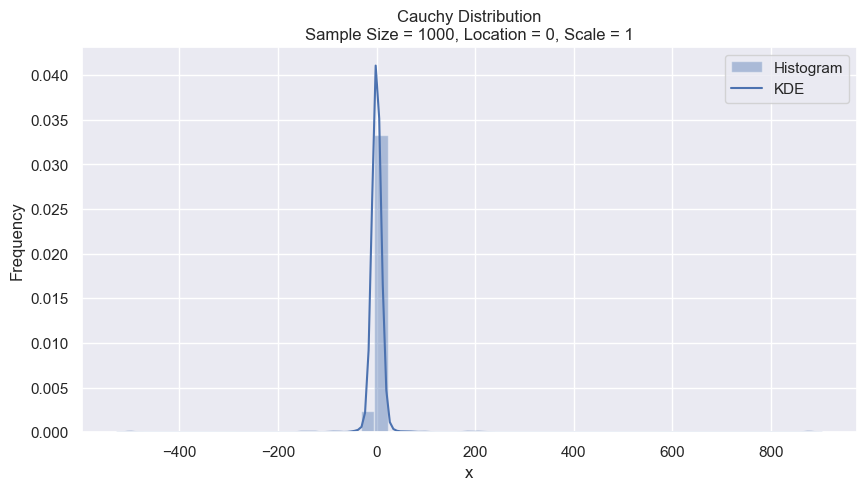

In [11]:
from scipy.stats import cauchy
sample_size = 1000
location = 0
scale = 1
array_of_Cauchy_distributed_numbers = cauchy.rvs(
    size = sample_size,
    loc = location,
    scale = scale
)
print("First 5 values from Cauchy distribution:")
print(array_of_Cauchy_distributed_numbers[0:5])
import seaborn as sns
sns.set(color_codes = True)
sns.set(rc = {'figure.figsize': (10, 5)})
the_Axes = sns.distplot(
    a = array_of_Cauchy_distributed_numbers,
    kde_kws = {"label": "KDE"},
    hist_kws = {"label": "Histogram"}
)
the_Axes.set(
    xlabel = "x",
    ylabel = "Frequency",
    title = (
        "Cauchy Distribution"
        + f"\nSample Size = {sample_size}, Location = {location}, Scale = {scale}"
    )
)
import matplotlib.pyplot as plt
plt.legend()
plt.savefig("Cauchy_Distribution.png")
plt.show()

C:\Users\Tom\AppData\Local\Temp\ipykernel_20372\2382496598.py:47: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  the_Axes = sns.kdeplot(
C:\Users\Tom\AppData\Local\Temp\ipykernel_20372\2382496598.py:47: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  the_Axes = sns.kdeplot(


[Text(0.5, 0, 'x'),
 Text(0, 0.5, 'y'),
 Text(0.5, 1.0, 'Continuous Shading Plot Of Multivariate Normally Distributed Random Pairs')]

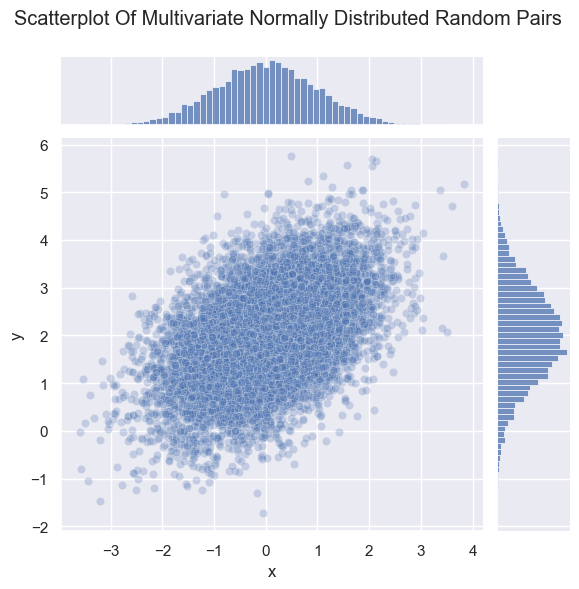

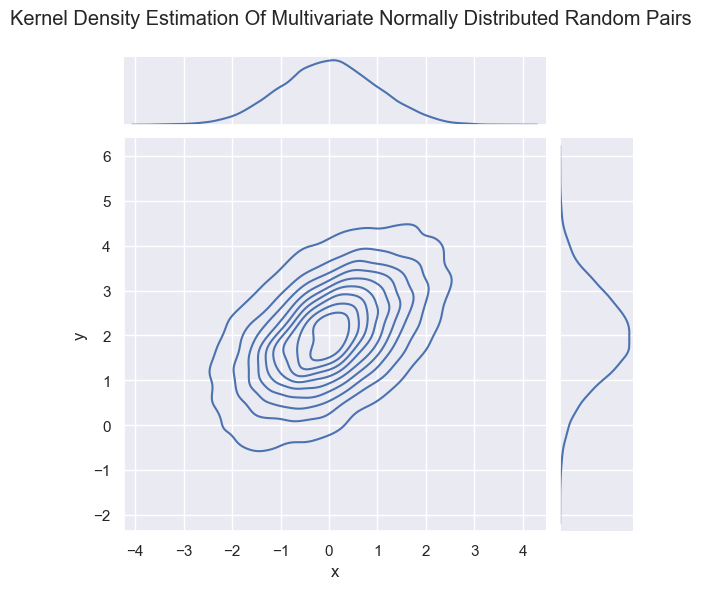

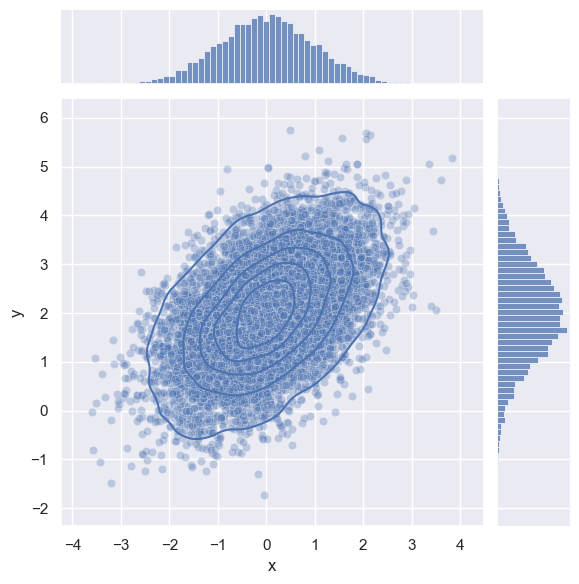

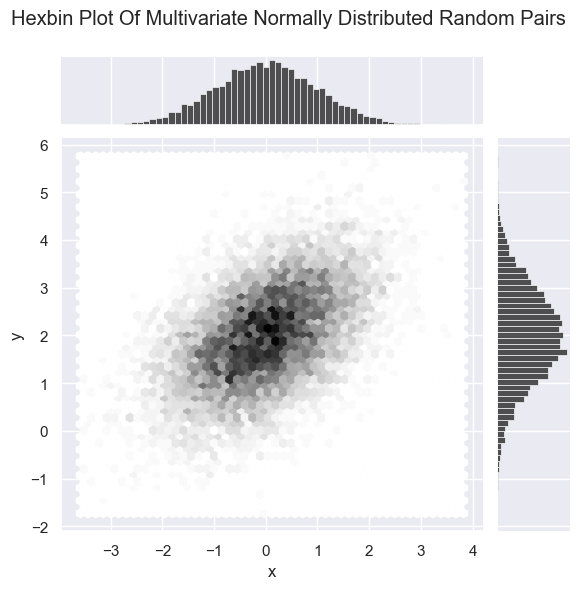

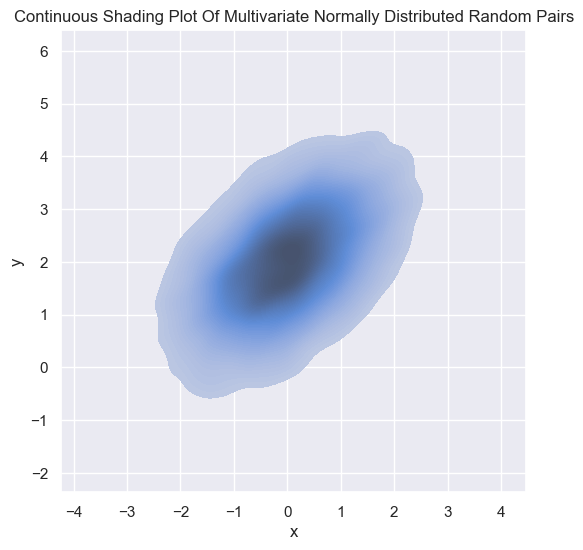

In [12]:
sample_size = 10000
mean = [0, 2]
covariance = [
    (1, 0.5),
    (0.5, 1)
]
array_of_multivariate_normally_distributed_random_pairs = np.random.multivariate_normal(
    mean = mean,
    cov = covariance,
    size = sample_size
)
import pandas as pd
data_frame_of_multivariate_normally_distributed_random_pairs = pd.DataFrame(
    data = array_of_multivariate_normally_distributed_random_pairs,
    columns = ["x", "y"]
)
import seaborn as sns
sns.set(color_codes = True)
sns.set(rc = {'figure.figsize': (10, 5)})

the_Axes = sns.jointplot(x = "x", y = "y", data = data_frame_of_multivariate_normally_distributed_random_pairs, alpha = 0.25)
the_Axes.fig.subplots_adjust(top = 0.9)
the_Axes.fig.suptitle("Scatterplot Of Multivariate Normally Distributed Random Pairs")

the_Axes = sns.jointplot(x = "x", y = "y", data = data_frame_of_multivariate_normally_distributed_random_pairs, kind = "kde")
the_Axes.fig.subplots_adjust(top = 0.9)
the_Axes.fig.suptitle("Kernel Density Estimation Of Multivariate Normally Distributed Random Pairs")

the_Axes = sns.jointplot(
    x = "x",
    y = "y",
    data = data_frame_of_multivariate_normally_distributed_random_pairs,
    alpha = 0.3
)
the_Axes = the_Axes.plot_joint(
    sns.kdeplot,
    zorder = 1,
    n_levels = 6
)

the_Axes = sns.jointplot(x = "x", y = "y", data = data_frame_of_multivariate_normally_distributed_random_pairs, kind = "hex", color = "k")
the_Axes.fig.subplots_adjust(top = 0.9)
the_Axes.fig.suptitle("Hexbin Plot Of Multivariate Normally Distributed Random Pairs")

figure, the_Axes = plt.subplots(figsize = (6, 6))
cmap = sns.cubehelix_palette(as_cmap = True, dark = 0, light = 1, reverse = True)
the_Axes = sns.kdeplot(
    x = data_frame_of_multivariate_normally_distributed_random_pairs.x,
    y = data_frame_of_multivariate_normally_distributed_random_pairs.y,
    palette = cmap,
    n_levels = 60,
    shade = True
)
the_Axes.set(
    xlabel = "x",
    ylabel = "y",
    title = f"Continuous Shading Plot Of Multivariate Normally Distributed Random Pairs"
)

In [13]:
print("Compute eigenvalues and eigenvectors of covariance to compare to plots:")
import numpy as np
tuple_of_eigenvalues_and_eigenvectors = np.linalg.eig(covariance)
print(f"Eigenvalues: {tuple_of_eigenvalues_and_eigenvectors[0]}")
print(f"Eigenvectors: {tuple_of_eigenvalues_and_eigenvectors[1]}")

Compute eigenvalues and eigenvectors of covariance to compare to plots:
Eigenvalues: [1.5 0.5]
Eigenvectors: [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


The Wishart distribution is a little different because the support of the distribution is the set of $p \times p$ positive definite matrices. We create and view one sample instead of a plot.

In [14]:
from scipy.stats import wishart
number_of_degrees_of_freedom = 2
scale = np.asarray([[2, 1], [1, 2]])
array_of_3_Wishart_distributed_random_matrices_with_height_and_width_equal_to_number_of_degrees_of_freedom = wishart.rvs(
    number_of_degrees_of_freedom,
    scale,
    size = 3
)
array_of_3_Wishart_distributed_random_matrices_with_height_and_width_equal_to_number_of_degrees_of_freedom

array([[[0.10320511, 0.37173761],
        [0.37173761, 2.75041917]],

       [[2.13620201, 1.68631782],
        [1.68631782, 4.43880653]],

       [[0.2537508 , 0.27620781],
        [0.27620781, 0.60756136]]])

## Section 2

In this section, we will compute some probabilities and likelihoods.

The binomial distribution with parameters $n$ and $p$ is the discrete probability distribution of the number of successes in a sequence of $n$ independent trials.

A probability is a number assigned to a possible outcome, and the sum or integral of the probabilities of all possible outcomes in the support of the distribution is equal to $1$.

A likelihood is a number that is assigned to a hypothesis about the underlying parameters for a distribution.

- For discrete random variables, the likelihood of the parameters $\theta$ given the outcome $X$ is equal to the Probability Mass Function (PMF) for this outcome given these parameters. In math, $L(\theta | X) = P(X | \theta)$.

- For continuous random variables, the likelihood of the parameters $\theta$ given the outcome $X$ is equal to the Probability Density Function (PDF) for this outcome given these parameters. In math, $L(\theta | X) = f(X | \theta)$.

In summary, the likelihood is a function of the parameters assuming the outcome is fixed. The Probability Mass / Density Function is a function of the outcome assumpting the parameters from the distribution are fixed. Both are equal to the Probability Mass / Density Function for the given outcome and parameters.

In [15]:
from scipy.stats import binom
number_of_trials_n = 10
probability_of_success_in_single_trial_p = 0.3
number_of_successes_x = 5
probability_of_x_given_n_and_p = binom.pmf(k = number_of_successes_x, n = number_of_trials_n, p = probability_of_success_in_single_trial_p)
print("For binomial distribution:")
print(
    f"Probability that a single scalar random variable X is number of successes x = {number_of_successes_x}"
    + f"\ngiven number of trials n = {number_of_trials_n} and probability of success in single trial p = {probability_of_success_in_single_trial_p}:"
    + f"\nf(x = {number_of_successes_x}, n = {number_of_trials_n}, p = {probability_of_success_in_single_trial_p}) = {probability_of_x_given_n_and_p}"
)
likelihood_of_n_and_p_given_x = binom.pmf(n = number_of_trials_n, p = probability_of_success_in_single_trial_p, k = number_of_successes_x)
print(
    f"Likelihood of number of trials n = {number_of_trials_n} and probability of success in single trial p = {probability_of_success_in_single_trial_p}"
    + f"\ngiven number of successes x = {number_of_successes_x}:"
    + f"\nL(n = {number_of_trials_n}, p = {probability_of_success_in_single_trial_p}, x = {number_of_successes_x}) = {likelihood_of_n_and_p_given_x}"
)

For binomial distribution:
Probability that a single scalar random variable X is number of successes x = 5
given number of trials n = 10 and probability of success in single trial p = 0.3:
f(x = 5, n = 10, p = 0.3) = 0.10291934519999989
Likelihood of number of trials n = 10 and probability of success in single trial p = 0.3
given number of successes x = 5:
L(n = 10, p = 0.3, x = 5) = 0.10291934519999989


In [17]:
from scipy.stats import norm
mean_mu = 3
standard_deviation_sigma = 2
x = 7
probability_of_x_given_mu_and_sigma = norm.pdf(x = x, loc = mean_mu, scale = standard_deviation_sigma)
print("For univariate normal distribution:")
print(
    f"Probability that a single scalar random variable X is x = {x}"
    + f"\ngiven mean \u03BC = {mean_mu} and standard deviation \u03C3 = {standard_deviation_sigma}:"
    + f"\nf(x = {x}, \u03BC = {mean_mu}, \u03C3 = {standard_deviation_sigma}) = {probability_of_x_given_mu_and_sigma}"
)
likelihood_of_mu_and_sigma_given_x = norm.pdf(loc = mean_mu, scale = standard_deviation_sigma, x = x)
print(
    f"Likelihood of mean \u03BC = {mean_mu} and standard deviation \u03C3 = {standard_deviation_sigma}"
    + f"\ngiven x = {x}:"
    + f"\nL(\u03BC = {mean_mu}, \u03C3 = {standard_deviation_sigma}, x = {x}) = {likelihood_of_mu_and_sigma_given_x}"
)

For univariate normal distribution:
Probability that a single scalar random variable X is x = 7
given mean μ = 3 and standard deviation σ = 2:
f(x = 7, μ = 3, σ = 2) = 0.02699548325659403
Likelihood of mean μ = 3 and standard deviation σ = 2
given x = 7:
L(μ = 3, σ = 2, x = 7) = 0.02699548325659403
